# **Projeto Final**

Arthur Rennan Santos Lira

Maria Eduarda Marques de Oliveira

**Problema**: A Secretaria da Mulher do Recife tem diversos projetos para mulheres empreendedoras, um deles é a Rede de Artesãs. Para organizar uma feira de artesanato com essas mulheres, foi pedido que cada artesã enviasse fotos de alguns de seus produtos para que a feira fosse organizada e dividida por tipo de artesanato.

**Solução**: Criar e treinar um modelo que identifique o produto em 4 tipos de artesanato: biscuit, cerâmica, fios e madeira.

# Pré-processamento de dados

In [ ]:
!git clone https://github.com/arthurrslira/rna.git

Cloning into 'rna'...
remote: Enumerating objects: 474, done.
remote: Counting objects: 100% (251/251), done.
remote: Compressing objects: 100% (239/239), done.
remote: Total 474 (delta 30), reused 218 (delta 12), pack-reused 223
Receiving objects: 100% (474/474), 214.07 MiB | 25.05 MiB/s, done.
Resolving deltas: 100% (82/82), done.
Updating files: 100% (350/350), done.


In [ ]:
# Diretório base onde estão as imagens
base_dir = "rna/dataset"

In [ ]:
# Lista de categorias
categorias = ["biscuit", "ceramica", "fios", "madeira"]

In [ ]:
import os
import shutil
import random

# Criar estrutura de pastas para treino e validação
for categoria in categorias:
    os.makedirs(f"{base_dir}/train/{categoria}", exist_ok=True)
    os.makedirs(f"{base_dir}/val/{categoria}", exist_ok=True)

# Função para dividir imagens em treino e validação
def dividir_imagens_em_treino_e_validacao(categoria, proporcao_validacao=0.5):
    path_categoria = f"{base_dir}/{categoria}"
    imagens = [f for f in os.listdir(path_categoria) if os.path.isfile(os.path.join(path_categoria, f))]

    # Embaralhar e dividir imagens
    random.shuffle(imagens)
    numero_validacao = int(len(imagens) * proporcao_validacao)

    for img in imagens[:numero_validacao]:
        shutil.move(f"{path_categoria}/{img}", f"{base_dir}/val/{categoria}/{img}")

    for img in imagens[numero_validacao:]:
        shutil.move(f"{path_categoria}/{img}", f"{base_dir}/train/{categoria}/{img}")

# Chamar função para cada categoria
for categoria in categorias:
    dividir_imagens_em_treino_e_validacao(categoria)

In [ ]:
# Criar os diretórios de validação
try:
    for categoria in categorias:
        path = f"{base_dir}/val/{categoria}"
        os.makedirs(path, exist_ok=True)
except OSError:
    print ("Criação do diretório falhou")
else:
    print ("Diretório criado com sucesso")

Diretório criado com sucesso


In [ ]:
# Definir pastas de treino e validação para cada categoria
diretorios_treino = {categoria: f"{base_dir}/train/{categoria}" for categoria in categorias}
diretorios_validacao = {categoria: f"{base_dir}/val/{categoria}" for categoria in categorias}

# Listar arquivos para cada categoria
arquivos_por_categoria = {categoria: os.listdir(diretorios_treino[categoria]) for categoria in categorias}

In [ ]:
print("Arquivos na categoria 'biscuit':")
print(arquivos_por_categoria["biscuit"])

Arquivos na categoria 'biscuit':
['IMG_8546.JPG', 'IMG_8529.JPG', 'IMG_8525.JPG', 'IMG_8515.JPG', 'IMG_8554.JPG', 'IMG_8521.JPG', 'IMG_8555.JPG', 'IMG_8500.JPG', 'IMG_8567.JPG', 'IMG_8531.JPG', 'IMG_8539.JPG', 'IMG_8509.JPG', 'IMG_8566.JPG', 'IMG_8499.JPG', 'IMG_8561.JPG', 'IMG_8542.JPG', 'IMG_8516.JPG', 'IMG_8565.JPG', 'IMG_8570.JPG', 'IMG_8541.JPG', 'IMG_8545.WEBP', 'IMG_8568.JPG', 'IMG_8558.JPG', 'IMG_8524.JPG', 'IMG_8505.JPG', 'IMG_8563.JPG', 'IMG_8511.JPG', 'IMG_8562.JPG', 'IMG_8528.JPG', 'IMG_8517.JPG', 'IMG_8492.JPG', 'IMG_8501.JPG', 'IMG_8494.JPG', 'IMG_8498.JPG', 'IMG_8503.JPG', 'IMG_8537.JPG', 'IMG_8552.JPG', 'IMG_8551.JPG']


In [ ]:
import re

# Isso moverá algumas imagens das pastas de treino para suas respectivas pastas de validação

for categoria in categorias:
    arquivos = arquivos_por_categoria[categoria]
    for f in arquivos:
        # Procura por arquivos cujos nomes contêm um número entre 5000 e 5999 (conforme a expressão regular "5\d\d\d")
        obj_validacao = re.search("5\d\d\d", f)
        if obj_validacao:
            shutil.move(f'{diretorios_treino[categoria]}/{f}', diretorios_validacao[categoria])


In [ ]:
# Lista os arquivos na pasta de validação da categoria 'biscuit'
print("Arquivos na pasta de validação 'biscuit':")
print(os.listdir(diretorios_validacao["biscuit"]))

Arquivos na pasta de validação 'biscuit':
['IMG_8543.JPG', 'IMG_8520.JPG', 'IMG_8523.JPG', 'IMG_8518.JPG', 'IMG_8569.JPG', 'IMG_8538.JPG', 'IMG_8491.JPG', 'IMG_8534.JPG', 'IMG_8502.JPG', 'IMG_8553.JPG', 'IMG_8508.JPG', 'IMG_8522.JPG', 'IMG_8535.JPG', 'IMG_8533.JPG', 'IMG_8496.JPG', 'IMG_8519.JPG', 'IMG_8532.JPG', 'a', 'IMG_8556.JPG', 'IMG_8557.JPG', 'IMG_8495.JPG', 'IMG_8526.JPG', 'IMG_8530.JPG', 'IMG_8560.JPG', 'IMG_8559.JPG', 'IMG_8547.WEBP', 'IMG_8544.JPG', 'IMG_8507.JPG', 'IMG_8540.JPG', 'IMG_8536.JPG', 'IMG_8549.JPG', 'IMG_8504.JPG', 'IMG_8564.JPG', 'IMG_8512.JPG', 'IMG_8527.JPG', 'IMG_8497.JPG', 'IMG_8510.JPG', 'IMG_8550.JPG']


# Carregando os dados

In [ ]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import copy

In [ ]:
# Definição das transformações
mean_nums = [0.485, 0.456, 0.406]
std_nums = [0.229, 0.224, 0.225]

chosen_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean_nums, std_nums)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean_nums, std_nums)
    ]),
}

In [ ]:
# Definir o diretório para os dados
data_dir = 'rna/dataset/'

# Usar a função ImageFolder para criar conjuntos de dados
chosen_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), chosen_transforms[x]) for x in ['train', 'val']}

# Mostrar os conjuntos de dados criados
chosen_datasets


{'train': Dataset ImageFolder
     Number of datapoints: 134
     Root location: rna/dataset/train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(256, 256), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=warn)
                RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 'val': Dataset ImageFolder
     Number of datapoints: 208
     Root location: rna/dataset/val
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=bilinear, max_size=None, antialias=warn)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            )}

In [ ]:
# Criação de iteráveis com os dataloaders
# Definindo o tamanho do lote (batch_size). Você pode ajustar esse número conforme necessário.
batch_size = 4

dataloaders = {
    x: torch.utils.data.DataLoader(chosen_datasets[x], batch_size=batch_size, shuffle=True, num_workers=2)
    for x in ['train', 'val']
}

# Mostrar os dataloaders criados
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7e014ab0f5b0>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7e014ab0f670>}

In [ ]:
# Determinando o tamanho dos conjuntos de dados e os nomes das classes
dataset_sizes = {x: len(chosen_datasets[x]) for x in ['train', 'val']}
class_names = chosen_datasets['train'].classes

# Definindo o dispositivo para treinamento (usará CUDA se disponível, caso contrário, usará CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mostrando os tamanhos dos conjuntos de dados e os nomes das classes
print(dataset_sizes)
print(class_names)

{'train': 134, 'val': 208}
['biscuit', 'ceramica', 'fios', 'madeira']


In [ ]:
# Função para visualizar algumas imagens
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array(mean_nums)
    std = np.array(std_nums)
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # Pause um pouco para que os gráficos sejam atualizados

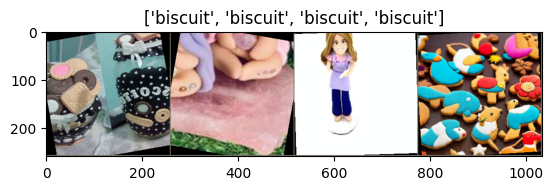

In [ ]:
# Pegue parte dos dados de treinamento para visualizar
inputs, classes = next(iter(dataloaders['train']))

# Agora, construímos uma grade a partir do lote
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

# Configurando um Modelo Pré-treinado

In [ ]:
# Carregue o modelo pré-treinado e redefina a camada totalmente conectada final

res_mod = models.resnet34(weights=True)

# Obtenha o número de características de entrada para a camada fc
num_ftrs = res_mod.fc.in_features

# Redefina a camada fc para ter 4 saídas (para suas 4 categorias)
res_mod.fc = nn.Linear(num_ftrs, 4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 125MB/s]


In [ ]:
# Se você quiser visualizar a composição do modelo:
for name, child in res_mod.named_children():
    print(name)

conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4
avgpool
fc


In [ ]:
# Envie o modelo para o dispositivo de treinamento
res_mod = res_mod.to(device)

# Defina o critério de perda
criterion = nn.CrossEntropyLoss()

# Observe que todos os parâmetros estão sendo otimizados
optimizer_ft = optim.SGD(res_mod.parameters(), lr=0.001, momentum=0.9)

# Decrescer a taxa de aprendizagem por um fator de 0.1 a cada 7 épocas
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            current_loss = 0.0
            current_corrects = 0

            # Here's where the training happens
            print('Iterando através dos dados...')

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # We need to zero the gradients, don't forget it
                optimizer.zero_grad()

                # Time to carry out the forward training poss
                # We only need to log the loss stats if we are in training phase
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # We want variables to hold the loss statistics
                current_loss += loss.item() * inputs.size(0)
                current_corrects += torch.sum(preds == labels.data)

            epoch_loss = current_loss / dataset_sizes[phase]
            epoch_acc = current_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # Make a copy of the model if the accuracy on the validation set has improved
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

            if phase == 'train':
                scheduler.step()

        print()

    time_since = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_since // 60, time_since % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # Now we'll load in the best model weights and return it
    model.load_state_dict(best_model_wts)
    return model

# Visualização

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_handled = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_handled += 1
                ax = plt.subplot(num_images // 2, 2, images_handled)
                ax.axis('off')
                ax.set_title('Previsto: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_handled == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

Epoch 0/2
----------
Iterando através dos dados...
train Loss: 1.3536 Acc: 0.3582
Iterando através dos dados...
val Loss: 0.8602 Acc: 0.6538

Epoch 1/2
----------
Iterando através dos dados...
train Loss: 0.9158 Acc: 0.6343
Iterando através dos dados...
val Loss: 0.7703 Acc: 0.7115

Epoch 2/2
----------
Iterando através dos dados...
train Loss: 0.8265 Acc: 0.6866
Iterando através dos dados...
val Loss: 0.4799 Acc: 0.8221

Training complete in 7m 24s
Best val Acc: 0.822115


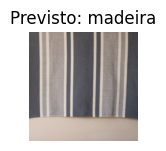

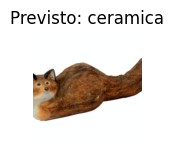

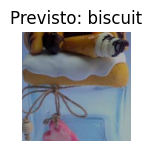

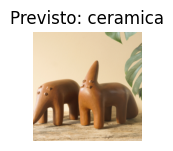

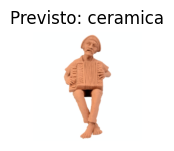

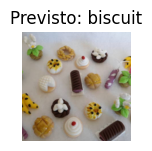

In [ ]:
modelo_base = train_model(res_mod, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=3)
visualize_model(modelo_base)
plt.show()

In [ ]:
# Salvar os pesos do modelo treinado
torch.save(modelo_base.state_dict(), "modelo_treinado.pt")

In [ ]:
# Carregar os pesos salvos de volta para o modelo
modelo_base.load_state_dict(torch.load("modelo_treinado.pt"))

# Definir o modelo para o modo de avaliação
modelo_base.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#Conclusão

O projeto em questão buscou desenvolver uma solução tecnológica para a Secretaria da Mulher do Recife, especificamente para a Rede de Artesãs. O objetivo era simplificar e automatizar o processo de categorização das peças de artesanato enviadas pelas artesãs para uma feira, classificando-as em quatro categorias principais: biscuit, cerâmica, fios e madeira.

Através do emprego de técnicas avançadas de redes neurais e deep learning, foi criado e treinado um modelo baseado na arquitetura ResNet-34, reconhecida por sua eficácia em tarefas de reconhecimento de imagens. Ao final do treinamento e ajustes, o modelo alcançou uma acurácia de 0.822115, o que significa que ele tem uma precisão de aproximadamente 82,21% ao identificar e classificar corretamente as peças nas categorias estabelecidas.

A acurácia obtida de 0.8221 (ou 82,21%) é bastante significativa, especialmente considerando a variedade e complexidade inerente aos produtos artesanais. Em contextos práticos, uma acurácia acima de 80% é frequentemente considerada boa, principalmente quando lidamos com categorias que podem ter sobreposições sutis em características visuais.

Futuras iterações poderiam explorar a ampliação do conjunto de dados, o uso de modelos mais complexos ou técnicas de aumento de dados para melhorar ainda mais a precisão. Além disso, a integração do modelo em uma plataforma ou aplicativo que permita às artesãs fazerem o upload de suas peças e receberem o feedback da classificação em tempo real pode ser um próximo passo valioso.

Em suma, o projeto demonstrou o potencial das redes neurais e do aprendizado profundo como ferramentas valiosas na promoção e organização do artesanato local, proporcionando uma solução tecnológica que visa valorizar e dar visibilidade ao trabalho das artesãs de Recife.

